# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# _K-means_

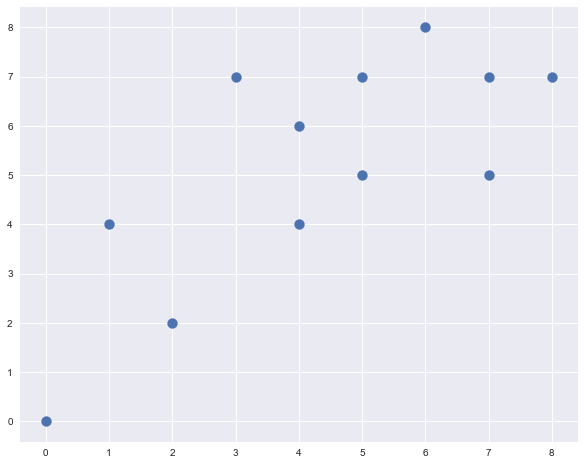

In [2]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [27]:
def plot_cluster(model, C0, C1, n):
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker='v', color='r')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100, marker='^', color='b')
    plt.scatter(C0[0], C0[1], s=200, color='r')
    plt.scatter(C1[0], C1[1], s=200, color='b')
    plt.title("max_iter : {}".format(n))
    plt.show()

In [12]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X, 
               np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
               np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
               model.labels_[:, np.newaxis]]), columns=['x0', 'x1', 'd0', 'd1', 'c'])
    return df

In [6]:
def cal_new_centroid(model, c0, c1):
    c0_new = X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean()
    c1_new = X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean()
    return c0_new, c1_new

### 1회차

In [7]:
model1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

In [8]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [9]:
model1.score(X)

-63.00408163265301

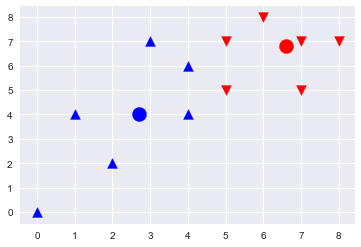

In [10]:
plot_cluster(model1, c0, c1)

In [13]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [14]:
cal_new_centroid(model1, c0, c1)

((6.333333333333333, 6.5), (2.3333333333333335, 3.8333333333333335))

### 2회차

In [15]:
model2 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=2, random_state=1).fit(X)
model2

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=2, n_clusters=2,
    n_init=1, n_jobs=1, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

In [21]:
model2.cluster_centers_

array([[6.33333333, 6.5       ],
       [2.33333333, 3.83333333]])

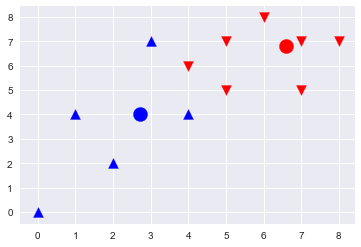

In [17]:
plot_cluster(model2, c0, c1)

In [18]:
kmeans_df(model2, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,0.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [19]:
cal_new_centroid(model2, c0, c1)

((6.0, 6.428571428571429), (2.0, 3.4))

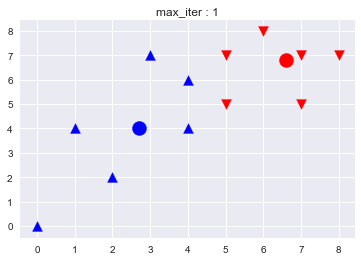

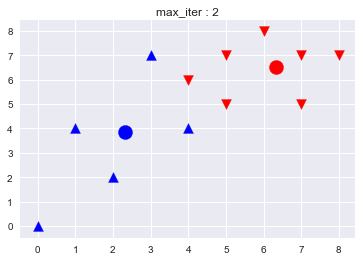

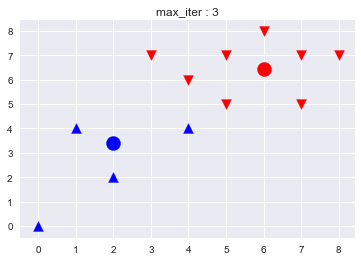

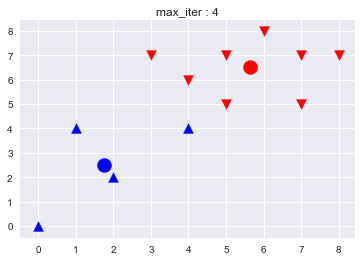

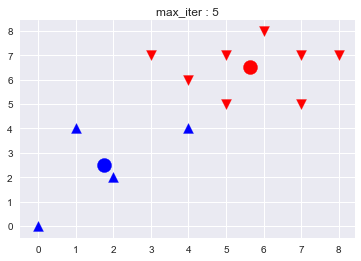

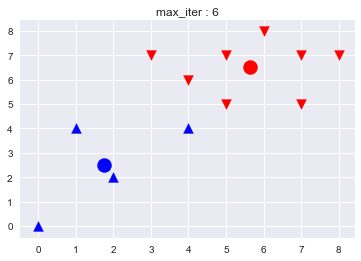

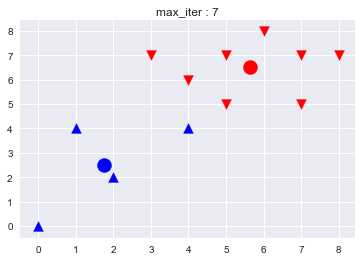

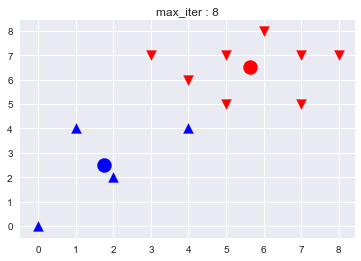

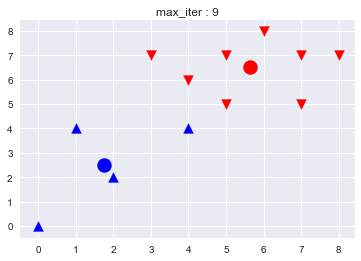

In [29]:
for i in range(1, 10):    
    model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=i, random_state=1).fit(X)
    c0, c1 = model.cluster_centers_
    plot_cluster(model, c0, c1, i)